In [1]:
import gzip
from Bio import SeqIO, SeqRecord
from Bio.SeqUtils import CodonAdaptationIndex
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import entropy
import numpy as np
import re
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from datetime import datetime
import random
from collections import Counter

human_proteome_path = "../../datasets/raw/Homo_sapiens.GRCh38.cds.all.fa.gz"
# base_path = "../../datasets/raw/spikenuc0415_clean_n_X.fasta"
# base_path = "../../datasets/raw/spike_nuc_clean_3813"
base_path = "../../datasets/test.fasta"
# de_novo_path = "../../sample_outputs/final_full/rnaformerS_large__generated__de_novo.fasta"
de_novo_path = "../../sample_outputs/2023_11_20__13_56_18/rnaformerS_large__generated__de_novo.fasta"
de_novo_human_path = "../../sample_outputs/final_full/rnaformerS_large_human_cai__generated__de_novo.fasta"
de_novo_covid_path = "../../sample_outputs/final_full/rnaformerS_large_covid_cai__generated__de_novo.fasta"

covid_3813_path = "../../datasets/test.fasta"
paths = []

pattern = re.compile("[^AatTgGcC*?]")

for i in range(0, 15):
    path = base_path.replace("X", str(i+1))
    paths.append(path)

def is_gene_valid(seq):
    if len(seq) % 3 != 0:
        return False
    if re.search(pattern, str(seq)):
        return False
    
    return True

CODON_INDICES = {
    "AAA": 0,
    "AAC": 1,
    "AAG": 2,
    "AAT": 3,

    "ACA": 4,
    "ACC": 5,
    "ACG": 6,
    "ACT": 7,
 
    "AGA": 8,
    "AGC": 9,
    "AGG": 10,
    "AGT": 11,
 
    "ATA": 12,
    "ATC": 13,
    "ATG": 14,
    "ATT": 15,
 
    "CAA": 16,
    "CAC": 17,
    "CAG": 18,
    "CAT": 19,

    "CCA": 20,
    "CCC": 21,
    "CCG": 22,
    "CCT": 23,
 
    "CGA": 24,
    "CGC": 25,
    "CGG": 26,
    "CGT": 27,
 
    "CTA": 28,
    "CTC": 29,
    "CTG": 30,
    "CTT": 31,

    "GAA": 32,
    "GAC": 33,
    "GAG": 34,
    "GAT": 35,

    "GCA": 36,
    "GCC": 37,
    "GCG": 38,
    "GCT": 39,
 
    "GGA": 40,
    "GGC": 41,
    "GGG": 42,
    "GGT": 43,
 
    "GTA": 44,
    "GTC": 45,
    "GTG": 46,
    "GTT": 47,

    "TAA": 48,
    "TAC": 49,
    "TAG": 50,
    "TAT": 51,

    "TCA": 52,
    "TCC": 53,
    "TCG": 54,
    "TCT": 55,
 
    "TGA": 56,
    "TGC": 57,
    "TGG": 58,
    "TGT": 59,
 
    "TTA": 60,
    "TTC": 61,
    "TTG": 62,
    "TTT": 63,
}

# Start Codon Usage

In [4]:
## Check if all sequences start with ATG
wrong_start_codon_de_novo = 0
wrong_start_codon_natural = 0

# Natural sequences
# for path in paths:
#     all = []
#     i = 0
#     with gzip.open(path, "rt") as handle:
#         for seq_record in tqdm(SeqIO.parse(handle, "fasta")):
#             if is_gene_valid(seq_record.seq):
#                 triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

#                 if triplets[0] != "ATG":
#                     wrong_start_codon_natural += 1
#                 i+=1
#             if i > 5000:
#                 break
#     # break
# Synthetic sequences
covid_seqs_file = SeqIO.parse(covid_3813_path, "fasta")
for seq_record in tqdm(covid_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if triplets[0] != "ATG":
            wrong_start_codon_natural += 1

print("Natural sequences not starting with ATG")
print(wrong_start_codon_natural)

# Synthetic sequences
de_novo_seqs_file = SeqIO.parse(de_novo_path, "fasta")
for seq_record in tqdm(de_novo_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if triplets[0] != "ATG":
            wrong_start_codon_de_novo += 1

print("RNAformerS-dummy sequences not starting with ATG")
print(wrong_start_codon_de_novo)

de_novo_seqs_file = SeqIO.parse(de_novo_covid_path, "fasta")
for seq_record in tqdm(de_novo_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if triplets[0] != "ATG":
            wrong_start_codon_de_novo += 1

print("RNAformerS-CAI-covid sequences not starting with ATG")
print(wrong_start_codon_de_novo)

de_novo_seqs_file = SeqIO.parse(de_novo_human_path, "fasta")
for seq_record in tqdm(de_novo_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if triplets[0] != "ATG":
            wrong_start_codon_de_novo += 1

print("RNAformerS-CAI-human sequences not starting with ATG")
print(wrong_start_codon_de_novo)

33198it [00:26, 1231.38it/s]


Natural sequences not starting with ATG
41


33001it [00:26, 1251.16it/s]


RNAformerS-dummy sequences not starting with ATG
2


33000it [00:26, 1263.51it/s]


RNAformerS-CAI-covid sequences not starting with ATG
3


33002it [00:25, 1287.55it/s]

RNAformerS-CAI-human sequences not starting with ATG
7


33198it [00:56, 585.09it/s]


[33157.     0.     0. ...     0.     0.     0.]


33001it [00:56, 580.14it/s]
33000it [00:56, 580.51it/s]
33002it [00:57, 578.65it/s]


     vals
0        
10      1
11      1
12      9
13    762
14  31803
15    582
16      7
18      1
20      1
23      1
25      1
28      1
33      2
36      2
52      1
58     22
59      1
    vals
0       
3      1
4      2
5      3
6      3
7      3
..   ...
86     5
87     3
88     3
89     1
91     4

[88 rows x 1 columns]
    vals
0       
2      1
3      5
4      7
5      6
6     19
7     45
8     64
9     91
10   167
11   497
12  1623
13  3960
14  5843
15  5582
16  4437
17  3017
18  1853
19  1116
20   745
21   511
22   363
23   283
24   273
25   242
26   264
27   233
28   220
29   228
30   193
31   178
32   180
33   140
34   131
35    97
36    71
37    73
38    40
39    40
40    29
41    20
42    23
43     9
44     8
45     8
46     6
47     5
49     5
50     1
51     2
54     2
55     1
     vals
0        
4       1
7       1
11      1
12      2
13      3
..    ...
127     2
128     2
130     1
131     1
138     1

[122 rows x 1 columns]


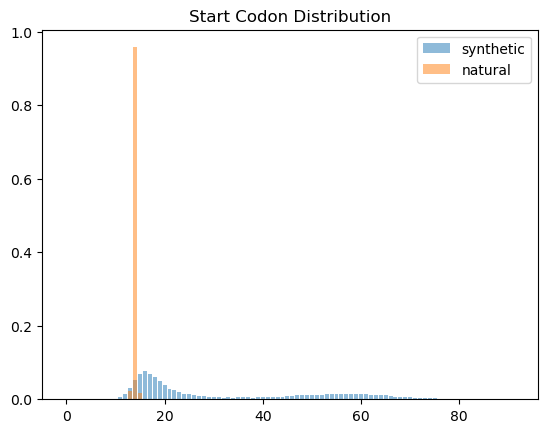

In [5]:
## Check number of ATG codons

# Natural sequences
# covid_biases = []
# covid_start_codons = {}
# for path in paths:
#     all = []
#     i = 0
#     with gzip.open(path, "rt") as handle:
#         for seq_record in tqdm(SeqIO.parse(handle, "fasta")):
#             if is_gene_valid(seq_record.seq):
#                 triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

#                 if triplets.count("ATG") in covid_start_codons:
#                     covid_start_codons[triplets.count("ATG")] += 1
#                 else:
#                     covid_start_codons[triplets.count("ATG")] = 1
#                 i+=1
#             if i > 5000:
#                 break
    # break
covid_seqs_file = SeqIO.parse(covid_3813_path, "fasta")
covid_biases = []
covid_start_codons = {}
covid_start_codon_locs = np.zeros(3813)
for seq_record in tqdm(covid_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if triplets.count("ATG") in covid_start_codons:
            covid_start_codons[triplets.count("ATG")] += 1
        else:
            covid_start_codons[triplets.count("ATG")] = 1

        for i ,e in enumerate(triplets):
            if e == 'ATG':
                covid_start_codon_locs[i] += 1
            
print(covid_start_codon_locs)

# Synthetic sequences
de_novo_seqs_file = SeqIO.parse(de_novo_path, "fasta")
de_novo_biases = []
de_novo_start_codons = {}
de_novo_start_codon_locs = np.zeros(3813)
for seq_record in tqdm(de_novo_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if triplets.count("ATG") in de_novo_start_codons:
            de_novo_start_codons[triplets.count("ATG")] += 1
        else:
            de_novo_start_codons[triplets.count("ATG")] = 1
        
        for i ,e in enumerate(triplets):
            if e == 'ATG':
                de_novo_start_codon_locs[i] += 1

de_novo_cai_covid_seqs_file = SeqIO.parse(de_novo_covid_path, "fasta")
de_novo_cai_covid_biases = []
de_novo_cai_covid_start_codons = {}
de_novo_cai_covid_start_codon_locs = np.zeros(3813)
for seq_record in tqdm(de_novo_cai_covid_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if triplets.count("ATG") in de_novo_cai_covid_start_codons:
            de_novo_cai_covid_start_codons[triplets.count("ATG")] += 1
        else:
            de_novo_cai_covid_start_codons[triplets.count("ATG")] = 1
        
        for i ,e in enumerate(triplets):
            if e == 'ATG':
                de_novo_cai_covid_start_codon_locs[i] += 1

de_novo_cai_human_seqs_file = SeqIO.parse(de_novo_human_path, "fasta")
de_novo_cai_human_biases = []
de_novo_cai_human_start_codons = {}
de_novo_cai_human_start_codon_locs = np.zeros(3813)
for seq_record in tqdm(de_novo_cai_human_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if triplets.count("ATG") in de_novo_cai_human_start_codons:
            de_novo_cai_human_start_codons[triplets.count("ATG")] += 1
        else:
            de_novo_cai_human_start_codons[triplets.count("ATG")] = 1
        
        for i ,e in enumerate(triplets):
            if e == 'ATG':
                de_novo_cai_human_start_codon_locs[i] += 1

covid_df = pd.DataFrame.from_dict(covid_start_codons.items()).sort_values(0).set_index(0).rename(columns={1: "vals"})
print(covid_df)
de_novo_df = pd.DataFrame.from_dict(de_novo_start_codons.items()).sort_values(0).set_index(0).rename(columns={1: "vals"})
print(de_novo_df)
de_novo_cai_covid_df = pd.DataFrame.from_dict(de_novo_cai_covid_start_codons.items()).sort_values(0).set_index(0).rename(columns={1: "vals"})
print(de_novo_cai_covid_df)
de_novo_cai_human_df = pd.DataFrame.from_dict(de_novo_cai_human_start_codons.items()).sort_values(0).set_index(0).rename(columns={1: "vals"})
print(de_novo_cai_human_df)

# Get max key to create bins for hisogram
max_key = np.max(list((de_novo_start_codons | covid_start_codons).keys()))
# print(max_key)
df_empty = pd.DataFrame({"vals":np.zeros(max_key+1)})
df_empty["vals"] = (df_empty["vals"] + de_novo_df["vals"]).fillna(0)
de_novo_df = df_empty
# print(list(de_novo_df["vals"]))

df_empty = pd.DataFrame({"vals":np.zeros(max_key+1)})
df_empty["vals"] = (df_empty["vals"] + covid_df["vals"]).fillna(0)
covid_df = df_empty
# print(covid_df["vals"])

bins = np.linspace(0, max_key, max_key+1)
# print(bins)
plt.bar(bins, de_novo_df["vals"]/np.sum(de_novo_df["vals"]) ,alpha=0.5, label='synthetic')
plt.bar(bins, covid_df["vals"]/np.sum(covid_df["vals"]) ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Start Codon Distribution")
plt.show()

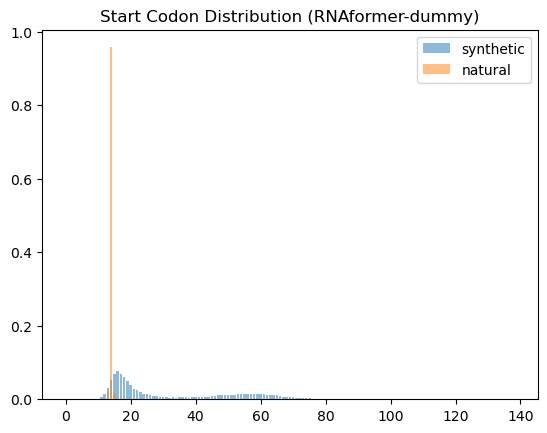

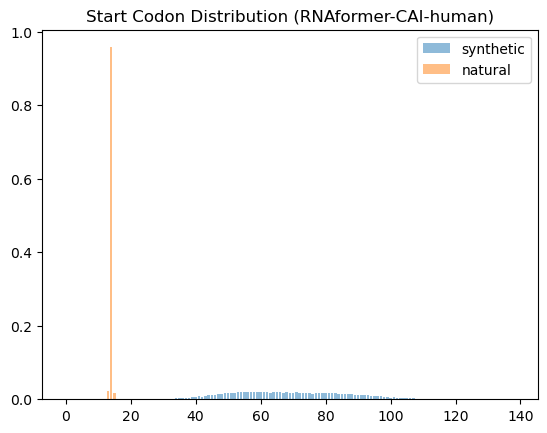

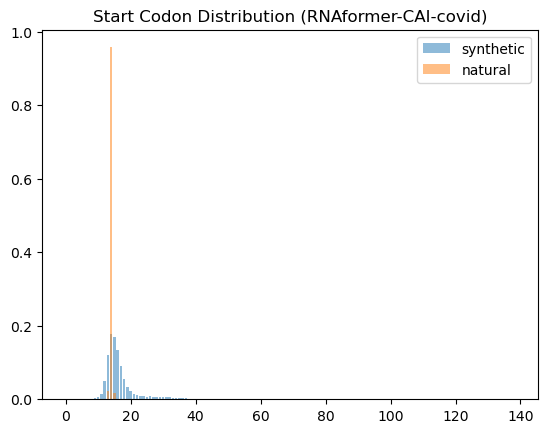

In [7]:
# Get max key to create bins for hisogram
max_key = np.max(list((de_novo_start_codons | de_novo_cai_human_start_codons | de_novo_cai_covid_start_codons | covid_start_codons).keys()))
# print(max_key)
df_empty = pd.DataFrame({"vals":np.zeros(max_key+1)})
df_empty["vals"] = (df_empty["vals"] + de_novo_df["vals"]).fillna(0)
de_novo_df = df_empty
# print(list(de_novo_df["vals"]))

df_empty = pd.DataFrame({"vals":np.zeros(max_key+1)})
df_empty["vals"] = (df_empty["vals"] + covid_df["vals"]).fillna(0)
covid_df = df_empty
# print(covid_df["vals"])

bins = np.linspace(0, max_key, max_key+1)
# print(bins)
plt.bar(bins, de_novo_df["vals"]/np.sum(de_novo_df["vals"]) ,alpha=0.5, label='synthetic')
plt.bar(bins, covid_df["vals"]/np.sum(covid_df["vals"]) ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Start Codon Distribution (RNAformer-dummy)")
plt.show()


# print(max_key)
df_empty = pd.DataFrame({"vals":np.zeros(max_key+1)})
df_empty["vals"] = (df_empty["vals"] + de_novo_cai_human_df["vals"]).fillna(0)
de_novo_cai_human_df = df_empty
# print(list(de_novo_df["vals"]))

df_empty = pd.DataFrame({"vals":np.zeros(max_key+1)})
df_empty["vals"] = (df_empty["vals"] + covid_df["vals"]).fillna(0)
covid_df = df_empty
# print(covid_df["vals"])

bins = np.linspace(0, max_key, max_key+1)
# print(bins)
plt.bar(bins, de_novo_cai_human_df["vals"]/np.sum(de_novo_cai_human_df["vals"]) ,alpha=0.5, label='synthetic')
plt.bar(bins, covid_df["vals"]/np.sum(covid_df["vals"]) ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Start Codon Distribution (RNAformer-CAI-human)")
plt.show()


df_empty = pd.DataFrame({"vals":np.zeros(max_key+1)})
df_empty["vals"] = (df_empty["vals"] + de_novo_cai_covid_df["vals"]).fillna(0)
de_novo_cai_covid_df = df_empty
# print(list(de_novo_df["vals"]))

df_empty = pd.DataFrame({"vals":np.zeros(max_key+1)})
df_empty["vals"] = (df_empty["vals"] + covid_df["vals"]).fillna(0)
covid_df = df_empty
# print(covid_df["vals"])

bins = np.linspace(0, max_key, max_key+1)
# print(bins)
plt.bar(bins, de_novo_cai_covid_df["vals"]/np.sum(de_novo_cai_covid_df["vals"]) ,alpha=0.5, label='synthetic')
plt.bar(bins, covid_df["vals"]/np.sum(covid_df["vals"]) ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Start Codon Distribution (RNAformer-CAI-covid)")
plt.show()

1270
[0.99993934 0.         0.         ... 0.         0.         0.        ]
[0.99876499 0.         0.         ... 0.         0.         0.        ]
[0.000e+00 1.000e+00 2.000e+00 ... 1.268e+03 1.269e+03 1.270e+03]


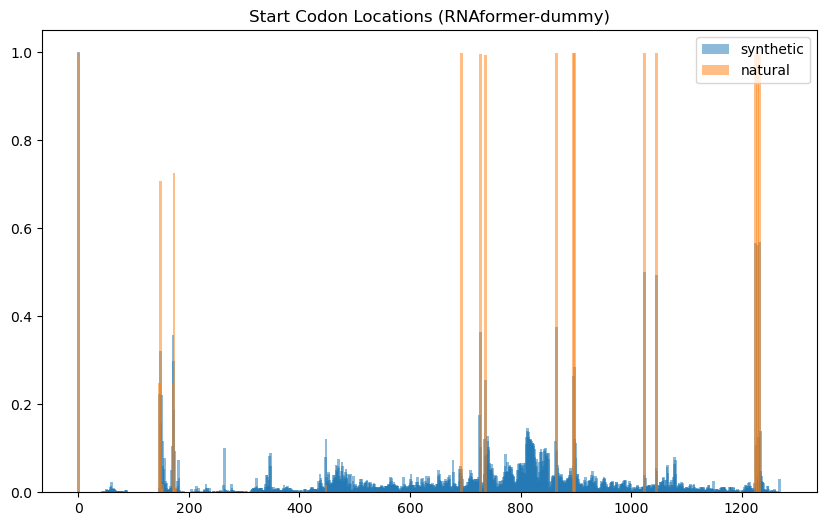

1270
[0.99987873 0.         0.         ... 0.         0.         0.        ]
[0.99876499 0.         0.         ... 0.         0.         0.        ]
[0.000e+00 1.000e+00 2.000e+00 ... 1.268e+03 1.269e+03 1.270e+03]


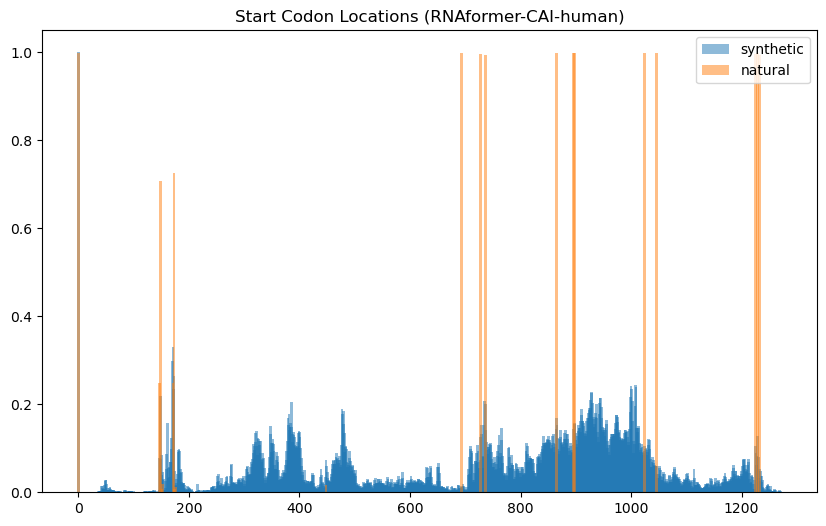

1270
[0.99996966 0.         0.         ... 0.         0.         0.        ]
[0.99876499 0.         0.         ... 0.         0.         0.        ]
[0.000e+00 1.000e+00 2.000e+00 ... 1.268e+03 1.269e+03 1.270e+03]


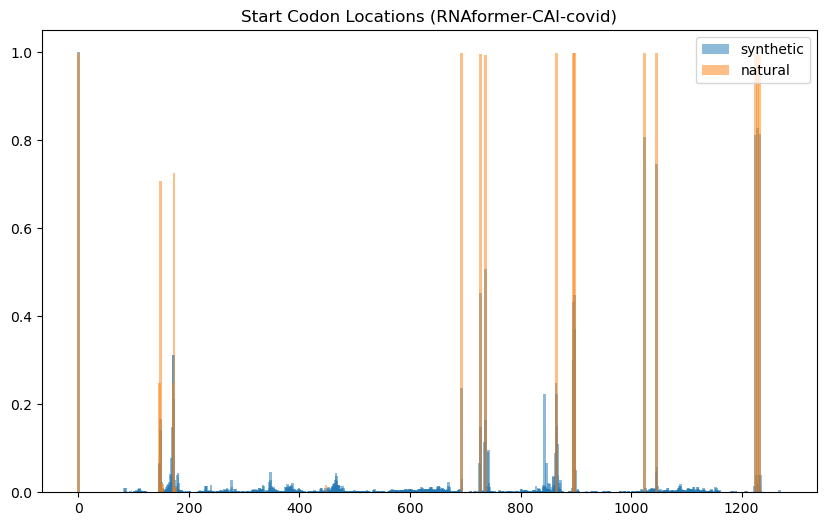

In [8]:
# Find the last start codon
last_codon = max(np.max(np.nonzero(de_novo_start_codon_locs)),np.max(np.nonzero(de_novo_cai_human_start_codon_locs)), np.max(np.nonzero(de_novo_cai_covid_start_codon_locs)), np.max(np.nonzero(covid_start_codon_locs)))
print(last_codon)
de_novo_start_codon_locs_short = de_novo_start_codon_locs[0:last_codon+1]
covid_start_codon_locs_short = covid_start_codon_locs[0:last_codon+1]

print(de_novo_start_codon_locs/np.sum(de_novo_df["vals"]))
print(covid_start_codon_locs/np.sum(covid_df["vals"]))

bins = np.linspace(0, last_codon, last_codon+1)
print(bins)
plt.figure(figsize=(10,6))
# print(bins)
plt.bar(bins, de_novo_start_codon_locs_short/np.sum(de_novo_df["vals"]), width=5 ,alpha=0.5, label='synthetic')
plt.bar(bins, covid_start_codon_locs_short/np.sum(covid_df["vals"]), width=5 ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Start Codon Locations (RNAformer-dummy)")
plt.show()

print(last_codon)
de_novo_cai_human_start_codon_locs_short = de_novo_cai_human_start_codon_locs[0:last_codon+1]
covid_start_codon_locs_short = covid_start_codon_locs[0:last_codon+1]

print(de_novo_cai_human_start_codon_locs/np.sum(de_novo_cai_human_df["vals"]))
print(covid_start_codon_locs/np.sum(covid_df["vals"]))

bins = np.linspace(0, last_codon, last_codon+1)
print(bins)
plt.figure(figsize=(10,6))
# print(bins)
plt.bar(bins, de_novo_cai_human_start_codon_locs_short/np.sum(de_novo_cai_human_df["vals"]), width=5 ,alpha=0.5, label='synthetic')
plt.bar(bins, covid_start_codon_locs_short/np.sum(covid_df["vals"]), width=5 ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Start Codon Locations (RNAformer-CAI-human)")
plt.show()

print(last_codon)
de_novo_cai_covid_start_codon_locs_short = de_novo_cai_covid_start_codon_locs[0:last_codon+1]
covid_start_codon_locs_short = covid_start_codon_locs[0:last_codon+1]

print(de_novo_cai_covid_start_codon_locs/np.sum(de_novo_cai_covid_df["vals"]))
print(covid_start_codon_locs/np.sum(covid_df["vals"]))

bins = np.linspace(0, last_codon, last_codon+1)
print(bins)
plt.figure(figsize=(10,6))
# print(bins)
plt.bar(bins, de_novo_cai_covid_start_codon_locs_short/np.sum(de_novo_cai_covid_df["vals"]), width=5 ,alpha=0.5, label='synthetic')
plt.bar(bins, covid_start_codon_locs_short/np.sum(covid_df["vals"]), width=5 ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Start Codon Locations (RNAformer-CAI-covid)")
plt.show()

# Stop Codon Usage

In [9]:
wrong_stop_codon_de_novo = 0
wrong_stop_codon_de_novo_cai_human = 0
wrong_stop_codon_de_novo_cai_covid = 0
wrong_stop_codon_natural = 0

# Natural sequences
# for path in paths:
#     all = []
#     i = 0
#     with gzip.open(path, "rt") as handle:
#         for seq_record in tqdm(SeqIO.parse(handle, "fasta")):
#             if is_gene_valid(seq_record.seq):
#                 triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

#                 if triplets[0] != "ATG":
#                     wrong_start_codon_natural += 1
#                 i+=1
#             if i > 5000:
#                 break
#     # break
# Synthetic sequences
# covid_seqs_file = SeqIO.parse(covid_3813_path, "fasta")
# for seq_record in tqdm(covid_seqs_file):
#     if is_gene_valid(seq_record.seq):
#         triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

#         if triplets[len(triplets)-1] != 'TAG' and triplets[len(triplets)-1] != 'TAA' and triplets[len(triplets)-1] != 'TGA':
#             wrong_stop_codon_natural += 1

# print(wrong_stop_codon_natural)

natural_seqs_file = SeqIO.parse(covid_3813_path, "fasta")
for seq_record in tqdm(natural_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if 'TAG' in triplets[0 : len(triplets)-1] or 'TAA' in triplets[0 : len(triplets)-1] or 'TGA' in triplets[0 : len(triplets)-1]:
            wrong_stop_codon_natural += 1

print("Number of sequences with premature stopcodons (natural)")
print(wrong_stop_codon_natural)

# Synthetic sequences
de_novo_seqs_file = SeqIO.parse(de_novo_path, "fasta")
for seq_record in tqdm(de_novo_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if 'TAG' in triplets[0 : len(triplets)-1] or 'TAA' in triplets[0 : len(triplets)-1] or 'TGA' in triplets[0 : len(triplets)-1]:
            wrong_stop_codon_de_novo += 1

print("Number of sequences with premature stopcodons (RNAformer-dummy)")
print(wrong_stop_codon_de_novo)

de_novo_cai_human_seqs_file = SeqIO.parse(de_novo_covid_path, "fasta")
for seq_record in tqdm(de_novo_cai_human_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if 'TAG' in triplets[0 : len(triplets)-1] or 'TAA' in triplets[0 : len(triplets)-1] or 'TGA' in triplets[0 : len(triplets)-1]:
            wrong_stop_codon_de_novo_cai_human += 1

print("Number of sequences with premature stopcodons (RNAformer-CAI-covid)")
print(wrong_stop_codon_de_novo_cai_human)

de_novo_cai_covid_seqs_file = SeqIO.parse(de_novo_human_path, "fasta")
for seq_record in tqdm(de_novo_cai_covid_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if 'TAG' in triplets[0 : len(triplets)-1] or 'TAA' in triplets[0 : len(triplets)-1] or 'TGA' in triplets[0 : len(triplets)-1]:
            wrong_stop_codon_de_novo_cai_covid += 1


print("Number of sequences with premature stopcodons (RNAformer-CAI-human)")
print(wrong_stop_codon_de_novo_cai_covid)

33198it [00:54, 613.04it/s]


Number of sequences with premature stopcodons (natural)
100


33001it [00:35, 931.73it/s] 


Number of sequences with premature stopcodons (RNAformer-dummy)
29668


33000it [00:34, 949.89it/s] 


Number of sequences with premature stopcodons (RNAformer-CAI-covid)
30406


33002it [00:31, 1046.40it/s]

Number of sequences with premature stopcodons (RNAformer-CAI-human)
32866


33198it [01:52, 295.96it/s]
33001it [01:54, 287.21it/s]
33002it [01:56, 284.32it/s]
33000it [01:54, 287.43it/s]


      vals
0         
1    33099
2       30
3        5
4       15
5        2
8        1
9        1
11       1
13       3
15       3
16       3
20       1
26       2
39       2
41       1
53       1
54       2
55      10
56      10
57       2
65       1
67       1
97       1
103      1
     vals
0        
0       7
1    3311
2    3133
3    2603
4    2032
..    ...
183     2
185     1
186     2
188     2
195     1

[177 rows x 1 columns]
    vals
0       
0      3
1    153
2    278
3    511
4    834
5   1143
6   1489
7   1830
8   2087
9   2147
10  2247
11  2140
12  2099
13  1941
14  1857
15  1604
16  1478
17  1336
18  1256
19  1170
20   992
21   839
22   703
23   551
24   492
25   393
26   322
27   239
28   194
29   166
30   114
31    91
32    65
33    62
34    40
35    30
36    25
37    22
38    14
39     9
40     5
41     4
42     2
43     1
44     3
46     1
49     2
51     1
     vals
0        
1    2556
2    3695
3    4180
4    3690
5    3232
..    ...
150     2
151     2
157     1


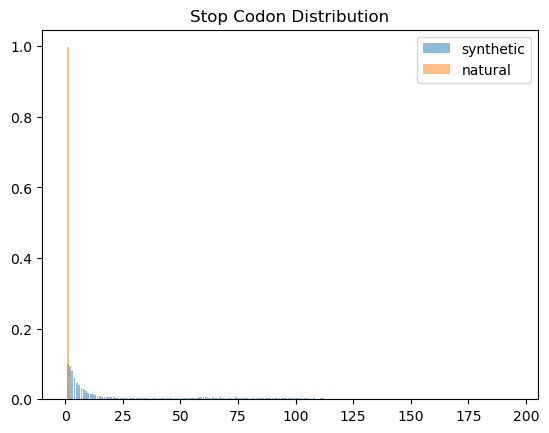

In [2]:
## Check number of ATG codons

# Natural sequences
# covid_biases = []
# covid_start_codons = {}
# for path in paths:
#     all = []
#     i = 0
#     with gzip.open(path, "rt") as handle:
#         for seq_record in tqdm(SeqIO.parse(handle, "fasta")):
#             if is_gene_valid(seq_record.seq):
#                 triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

#                 if triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA") in covid_start_codons:
#                     covid_start_codons[triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA")] += 1
#                 else:
#                     covid_start_codons[triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA")] = 1
#                 i+=1
#             if i > 5000:
#                 break
    # break

covid_seqs_file = SeqIO.parse(covid_3813_path, "fasta")
covid_biases = []
covid_stop_codons = {}
covid_stop_codon_locs = np.zeros(3813)
for seq_record in tqdm(covid_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA") in covid_stop_codons:
            covid_stop_codons[triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA")] += 1
        else:
            covid_stop_codons[triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA")] = 1

        for i ,e in enumerate(triplets):
            if e == 'TAG' or e == 'TAA' or e == 'TGA':
                covid_stop_codon_locs[i] += 1




# Synthetic sequences
de_novo_seqs_file = SeqIO.parse(de_novo_path, "fasta")
de_novo_biases = []
de_novo_stop_codons = {}
de_novo_stop_codon_locs = np.zeros(3813)
for seq_record in tqdm(de_novo_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA") in de_novo_stop_codons:
            de_novo_stop_codons[triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA")] += 1
        else:
            de_novo_stop_codons[triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA")] = 1

        for i ,e in enumerate(triplets):
            if e == 'TAG' or e == 'TAA' or e == 'TGA':
                de_novo_stop_codon_locs[i] += 1

# Synthetic sequences
de_novo_cai_human_seqs_file = SeqIO.parse(de_novo_human_path, "fasta")
de_novo_cai_human_biases = []
de_novo_cai_human_stop_codons = {}
de_novo_cai_human_stop_codon_locs = np.zeros(3813)
for seq_record in tqdm(de_novo_cai_human_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA") in de_novo_cai_human_stop_codons:
            de_novo_cai_human_stop_codons[triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA")] += 1
        else:
            de_novo_cai_human_stop_codons[triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA")] = 1

        for i ,e in enumerate(triplets):
            if e == 'TAG' or e == 'TAA' or e == 'TGA':
                de_novo_cai_human_stop_codon_locs[i] += 1

# Synthetic sequences
de_novo_cai_covid_seqs_file = SeqIO.parse(de_novo_covid_path, "fasta")
de_novo_cai_covid_biases = []
de_novo_cai_covid_stop_codons = {}
de_novo_cai_covid_stop_codon_locs = np.zeros(3813)
for seq_record in tqdm(de_novo_cai_covid_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]

        if triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA") in de_novo_cai_covid_stop_codons:
            de_novo_cai_covid_stop_codons[triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA")] += 1
        else:
            de_novo_cai_covid_stop_codons[triplets.count("TAG") + triplets.count("TAA") + triplets.count("TGA")] = 1

        for i ,e in enumerate(triplets):
            if e == 'TAG' or e == 'TAA' or e == 'TGA':
                de_novo_cai_covid_stop_codon_locs[i] += 1

covid_df = pd.DataFrame.from_dict(covid_stop_codons.items()).sort_values(0).set_index(0).rename(columns={1: "vals"})
print(covid_df)
de_novo_df = pd.DataFrame.from_dict(de_novo_stop_codons.items()).sort_values(0).set_index(0).rename(columns={1: "vals"})
print(de_novo_df)
de_novo_cai_human_df = pd.DataFrame.from_dict(de_novo_cai_human_stop_codons.items()).sort_values(0).set_index(0).rename(columns={1: "vals"})
print(de_novo_cai_human_df)
de_novo_cai_covid_df = pd.DataFrame.from_dict(de_novo_cai_covid_stop_codons.items()).sort_values(0).set_index(0).rename(columns={1: "vals"})
print(de_novo_cai_covid_df)

# Get max key to create bins for hisogram
max_key = np.max(list((de_novo_stop_codons | covid_stop_codons).keys()))
# print(max_key)
df_empty = pd.DataFrame({"vals":np.zeros(max_key+1)})
df_empty["vals"] = (df_empty["vals"] + de_novo_df["vals"]).fillna(0)
de_novo_df = df_empty
# print(list(de_novo_df["vals"]))

df_empty = pd.DataFrame({"vals":np.zeros(max_key+1)})
df_empty["vals"] = (df_empty["vals"] + covid_df["vals"]).fillna(0)
covid_df = df_empty
# print(covid_df["vals"])

bins = np.linspace(0, max_key, max_key+1)
# print(bins)
plt.bar(bins, de_novo_df["vals"]/np.sum(de_novo_df["vals"]) ,alpha=0.5, label='synthetic')
plt.bar(bins, covid_df["vals"]/np.sum(covid_df["vals"]) ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Stop Codon Distribution")
plt.show()

33169.0
21454.0
5153.0
29517.0


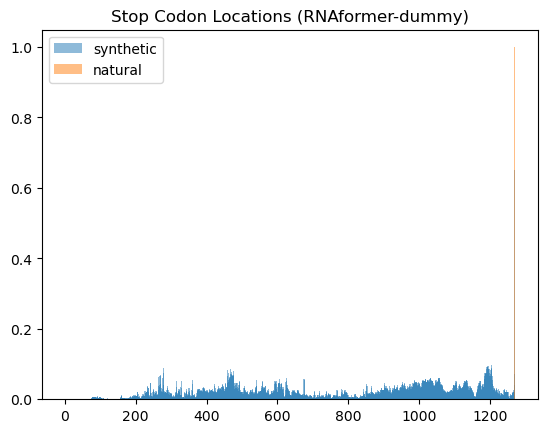

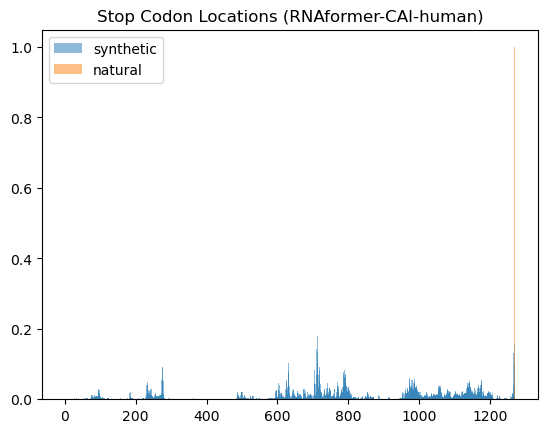

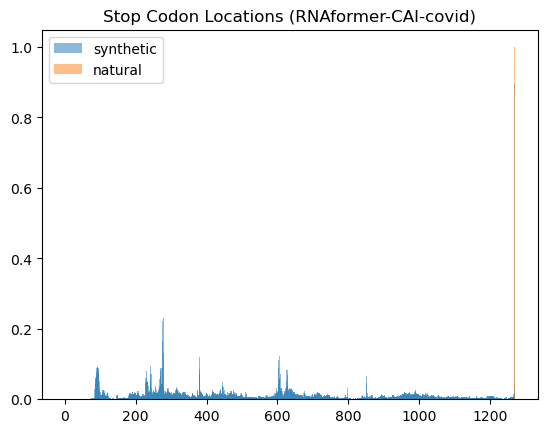

In [3]:
# Find the last start codon
print(covid_stop_codon_locs[1270])
print(de_novo_stop_codon_locs[1270])
print(de_novo_cai_human_stop_codon_locs[1270])
print(de_novo_cai_covid_stop_codon_locs[1270])

last_codon = max(np.max(np.nonzero(de_novo_stop_codon_locs)), np.max(np.nonzero(de_novo_cai_human_stop_codon_locs)), np.max(np.nonzero(de_novo_cai_covid_stop_codon_locs)), np.max(np.nonzero(covid_stop_codon_locs)))
# print(last_codon)
de_novo_stop_codon_locs_short = de_novo_stop_codon_locs[0:last_codon+1]
covid_stop_codon_locs_short = covid_stop_codon_locs[0:last_codon+1]

# print(de_novo_stop_codon_locs_short)
# print(covid_stop_codon_locs_short)

# print(de_novo_stop_codon_locs_short/np.sum(de_novo_df["vals"]))
# print(covid_stop_codon_locs_short/np.sum(covid_df["vals"]))

bins = np.linspace(0, last_codon, last_codon+1)
# print(bins)
# print(bins)
plt.bar(bins, de_novo_stop_codon_locs_short/np.sum(de_novo_df["vals"]), width=3 ,alpha=0.5, label='synthetic')
plt.bar(bins, covid_stop_codon_locs_short/np.sum(covid_df["vals"]), width=3 ,alpha=0.5, label='natural')
plt.legend(loc='upper left')
plt.title("Stop Codon Locations (RNAformer-dummy)")
plt.show()

de_novo_cai_human_stop_codon_locs_short = de_novo_cai_human_stop_codon_locs[0:last_codon+1]
covid_stop_codon_locs_short = covid_stop_codon_locs[0:last_codon+1]

# print(de_novo_stop_codon_locs_short)
# print(covid_stop_codon_locs_short)

# print(de_novo_stop_codon_locs_short/np.sum(de_novo_df["vals"]))
# print(covid_stop_codon_locs_short/np.sum(covid_df["vals"]))

bins = np.linspace(0, last_codon, last_codon+1)
# print(bins)
# print(bins)
plt.bar(bins, de_novo_cai_human_stop_codon_locs_short/np.sum(de_novo_cai_human_df["vals"]), width=3 ,alpha=0.5, label='synthetic')
plt.bar(bins, covid_stop_codon_locs_short/np.sum(covid_df["vals"]), width=3 ,alpha=0.5, label='natural')
plt.legend(loc='upper left')
plt.title("Stop Codon Locations (RNAformer-CAI-human)")
plt.show()

de_novo_cai_covid_stop_codon_locs_short = de_novo_cai_covid_stop_codon_locs[0:last_codon+1]
covid_stop_codon_locs_short = covid_stop_codon_locs[0:last_codon+1]

# print(de_novo_stop_codon_locs_short)
# print(covid_stop_codon_locs_short)

# print(de_novo_stop_codon_locs_short/np.sum(de_novo_df["vals"]))
# print(covid_stop_codon_locs_short/np.sum(covid_df["vals"]))

bins = np.linspace(0, last_codon, last_codon+1)
# print(bins)
# print(bins)
plt.bar(bins, de_novo_cai_covid_stop_codon_locs_short/np.sum(de_novo_cai_covid_df["vals"]), width=3 ,alpha=0.5, label='synthetic')
plt.bar(bins, covid_stop_codon_locs_short/np.sum(covid_df["vals"]), width=3 ,alpha=0.5, label='natural')
plt.legend(loc='upper left')
plt.title("Stop Codon Locations (RNAformer-CAI-covid)")
plt.show()

# Shannon Entropy

33198it [5:37:06,  1.64it/s]


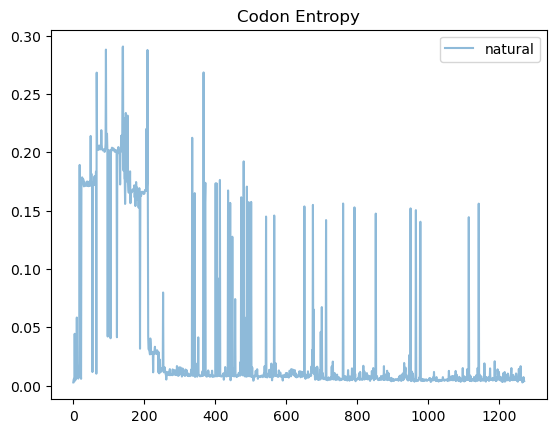

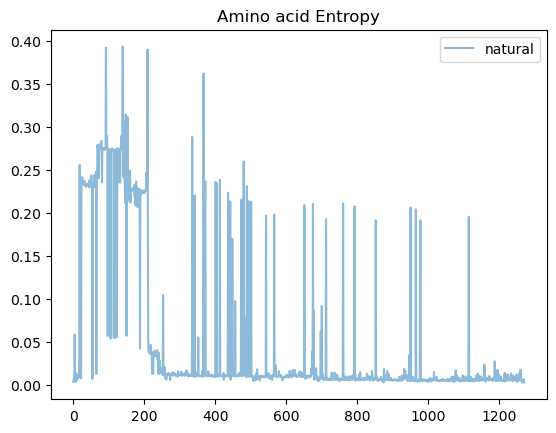

In [2]:
covid_seqs_file = SeqIO.parse(covid_3813_path, "fasta")
covid_df = pd.DataFrame(columns=range(0,1271))
covid_protein_df = pd.DataFrame(columns=range(0,1271))
i = 0
for seq_record in tqdm(covid_seqs_file):
    if is_gene_valid(seq_record.seq):
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]
        covid_df.loc[len(covid_df)] = triplets
        covid_protein_df.loc[len(covid_df)] = [*seq_record.seq.translate(to_stop=False)]
        i += 1
        # if i > 100:
        #     break


covid_df = covid_df.transpose()
entropies = []
# print(covid_df)
for _, row in covid_df.iterrows():
    counts = np.divide(list(Counter(row).values()), i)
    e = entropy(counts, base = 64)
    entropies.append(e)

plt.plot(range(0,1271), entropies ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Codon Entropy")
plt.show()

covid_protein_df = covid_protein_df.transpose()
protein_entropies = []
# print(covid_protein_df)
for _, row in covid_protein_df.iterrows():
    # print(row)
    counts = np.divide(list(Counter(row).values()), i)

    # print(counts)
    e = entropy(counts, base = 21)
    protein_entropies.append(e)

plt.plot(range(0,1271), protein_entropies ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Amino acid Entropy")
plt.show()
# covid_entropy = entropy(covid_protein_df)
# print(covid_entropy)

In [3]:
import pickle 

with open('natural_entropy_sequences_df.pkl', 'wb') as f:
  pickle.dump(covid_df, f)

with open('natural_entropy_sequences_df_protein.pkl', 'wb') as f:
  pickle.dump(covid_protein_df, f)

: 

: 

33001it [6:01:20,  1.52it/s]


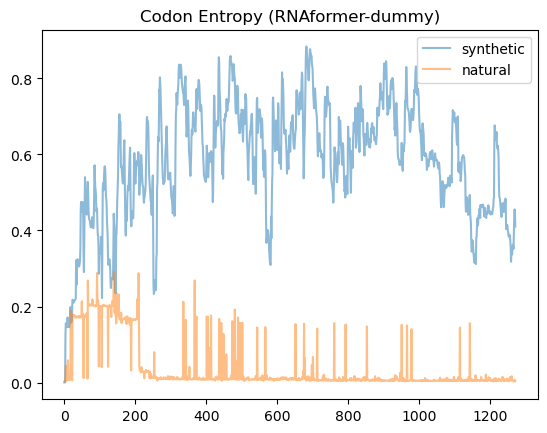

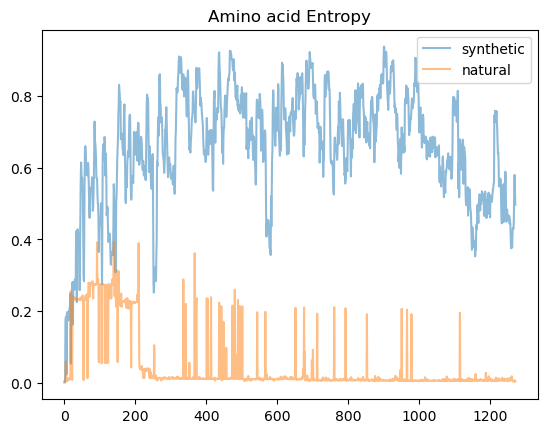

In [13]:
de_novo_seqs_file = SeqIO.parse(de_novo_path, "fasta")
de_novo_df = pd.DataFrame(columns=range(0,1271))
de_novo_protein_df = pd.DataFrame(columns=range(0,1271))
i = 0
for seq_record in tqdm(de_novo_seqs_file):
    if is_gene_valid(seq_record.seq) and len(seq_record.seq) == 3813:
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]
        de_novo_df.loc[len(de_novo_df)] = triplets
        de_novo_protein_df.loc[len(de_novo_df)] = [*seq_record.seq.translate(to_stop=False)]
        i += 1
        # if i > 100:
        #     break


de_novo_df = de_novo_df.transpose()
de_novo_entropies = []
# print(de_novo_df)
for _, row in de_novo_df.iterrows():
    # print(row)
    counts = np.divide(list(Counter(row).values()), i)
    e = entropy(counts, base = 64)
    de_novo_entropies.append(e)

plt.plot(range(0,1271), de_novo_entropies ,alpha=0.5, label='synthetic')
plt.plot(range(0,1271), entropies ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Codon Entropy (RNAformer-dummy)")
plt.show()
# covid_entropy = entropy(covid_df)
# print(covid_entropy)

de_novo_protein_df = de_novo_protein_df.transpose()
de_novo_protein_entropies = []
# print(de_novo_protein_df)
for _, row in de_novo_protein_df.iterrows():
    # print(row)
    counts = np.divide(list(Counter(row).values()), i)
    e = entropy(counts, base = 21)
    de_novo_protein_entropies.append(e)

plt.plot(range(0,1271), de_novo_protein_entropies ,alpha=0.5, label='synthetic')
plt.plot(range(0,1271), protein_entropies ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Amino acid Entropy")
plt.show()

33002it [5:02:27,  1.82it/s]


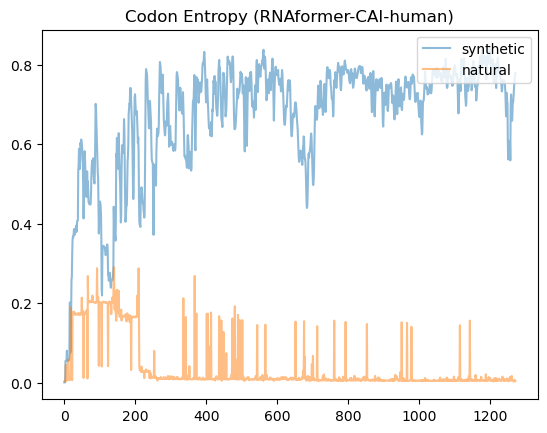

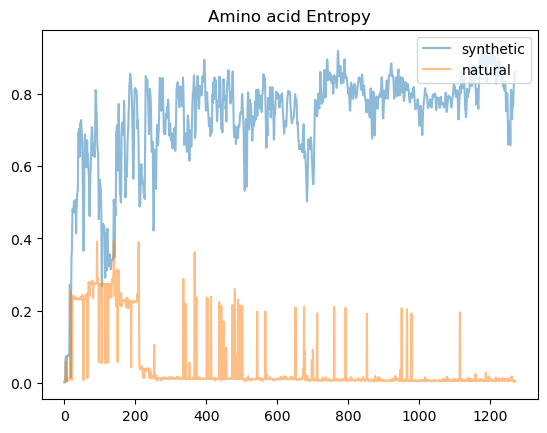

In [4]:
de_novo_cai_human_seqs_file = SeqIO.parse(de_novo_human_path, "fasta")
de_novo_cai_human_df = pd.DataFrame(columns=range(0,1271))
de_novo_cai_human_protein_df = pd.DataFrame(columns=range(0,1271))
i = 0
for seq_record in tqdm(de_novo_cai_human_seqs_file):
    if is_gene_valid(seq_record.seq) and len(seq_record.seq) == 3813:
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]
        de_novo_cai_human_df.loc[len(de_novo_cai_human_df)] = triplets
        de_novo_cai_human_protein_df.loc[len(de_novo_cai_human_df)] = [*seq_record.seq.translate(to_stop=False)]
        i += 1
        # if i > 100:
        #     break


de_novo_cai_human_df = de_novo_cai_human_df.transpose()
de_novo_cai_human_entropies = []
# print(de_novo_cai_human_df)
for _, row in de_novo_cai_human_df.iterrows():
    # print(row)
    counts = np.divide(list(Counter(row).values()), i)
    e = entropy(counts, base = 64)
    de_novo_cai_human_entropies.append(e)

plt.plot(range(0,1271), de_novo_cai_human_entropies ,alpha=0.5, label='synthetic')
plt.plot(range(0,1271), entropies ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Codon Entropy (RNAformer-CAI-human)")
plt.show()
# covid_entropy = entropy(covid_df)
# print(covid_entropy)

de_novo_cai_human_protein_df = de_novo_cai_human_protein_df.transpose()
de_novo_cai_human_protein_entropies = []
# print(de_novo_protein_df)
for _, row in de_novo_cai_human_protein_df.iterrows():
    # print(row)
    counts = np.divide(list(Counter(row).values()), i)
    e = entropy(counts, base = 21)
    de_novo_cai_human_protein_entropies.append(e)

plt.plot(range(0,1271), de_novo_cai_human_protein_entropies ,alpha=0.5, label='synthetic')
plt.plot(range(0,1271), protein_entropies ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Amino acid Entropy")
plt.show()

33000it [5:37:46,  1.63it/s]


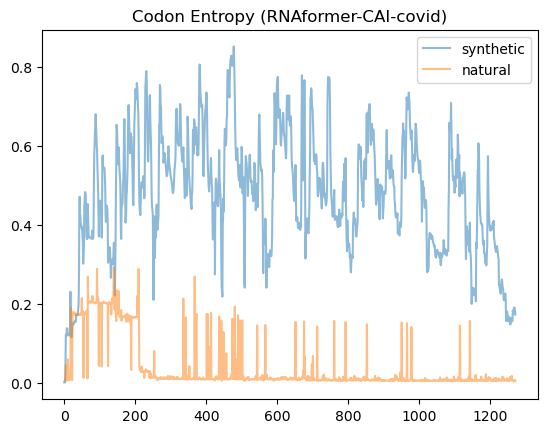

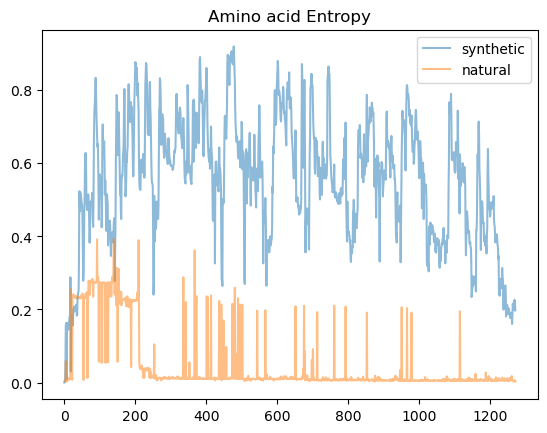

In [5]:
de_novo_cai_covid_seqs_file = SeqIO.parse(de_novo_covid_path, "fasta")
de_novo_cai_covid_df = pd.DataFrame(columns=range(0,1271))
de_novo_cai_covid_protein_df = pd.DataFrame(columns=range(0,1271))
i = 0
for seq_record in tqdm(de_novo_cai_covid_seqs_file):
    if is_gene_valid(seq_record.seq) and len(seq_record.seq) == 3813:
        triplets = [seq_record.seq[i:i+3] for i in range(0, len(seq_record.seq), 3)]
        de_novo_cai_covid_df.loc[len(de_novo_cai_covid_df)] = triplets
        de_novo_cai_covid_protein_df.loc[len(de_novo_cai_covid_df)] = [*seq_record.seq.translate(to_stop=False)]
        i += 1
        # if i > 100:
        #     break


de_novo_cai_covid_df = de_novo_cai_covid_df.transpose()
de_novo_cai_covid_entropies = []
# print(de_novo_cai_covid_df)
for _, row in de_novo_cai_covid_df.iterrows():
    # print(row)
    counts = np.divide(list(Counter(row).values()), i)
    e = entropy(counts, base = 64)
    de_novo_cai_covid_entropies.append(e)

plt.plot(range(0,1271), de_novo_cai_covid_entropies ,alpha=0.5, label='synthetic')
plt.plot(range(0,1271), entropies ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Codon Entropy (RNAformer-CAI-covid)")
plt.show()
# covid_entropy = entropy(covid_df)
# print(covid_entropy)

de_novo_cai_covid_protein_df = de_novo_cai_covid_protein_df.transpose()
de_novo_cai_covid_protein_entropies = []
# print(de_novo_protein_df)
for _, row in de_novo_cai_covid_protein_df.iterrows():
    # print(row)
    counts = np.divide(list(Counter(row).values()), i)
    e = entropy(counts, base = 21)
    de_novo_cai_covid_protein_entropies.append(e)

plt.plot(range(0,1271), de_novo_cai_covid_protein_entropies ,alpha=0.5, label='synthetic')
plt.plot(range(0,1271), protein_entropies ,alpha=0.5, label='natural')
plt.legend(loc='upper right')
plt.title("Amino acid Entropy")
plt.show()

# Codon distance

In [9]:
def genetic_distance(cai_1, cai_2):
    return abs(cai_1 - cai_2).sum() / 2

# Calculate the average (mean and std) CAI among the real samples
covid_seqs_file = SeqIO.parse(covid_3813_path, "fasta")
covid_CAIs = []
for seq_record in tqdm(covid_seqs_file):
    if is_gene_valid(seq_record.seq):
        covid_CAIs.append(list(CodonAdaptationIndex([seq_record.seq]).values()))

covid_CAI = np.mean(covid_CAIs, axis=0)
covid_CAI_std = np.std(covid_CAIs, axis=0)
# print(covid_CAI)
# print(covid_CAI_std)

# Calculate a vector of CAIs among the de novo sequences
de_novo_seqs_file = SeqIO.parse(de_novo_path, "fasta")
de_novo_CAIs = []
for seq_record in tqdm(de_novo_seqs_file):
    if is_gene_valid(seq_record.seq):
        de_novo_CAIs.append(list(CodonAdaptationIndex([seq_record.seq]).values()))

# de_novo_CAI = np.mean(de_novo_CAIs, axis=0)
# de_novo_CAI_std = np.std(de_novo_CAIs, axis=0)
# print(de_novo_CAI)
# print(de_novo_CAI_std)

# Calculate the distance between the de novo CAIs and the template CAI
difs = []
for cai in de_novo_CAIs:
    difs.append(genetic_distance(cai, covid_CAI))
    
# Calculate mean distance and std
mean_dif = np.mean(difs)
dif_std = np.std(difs)
print(mean_dif)
print(dif_std)
# Plot the distribution



33198it [00:49, 666.45it/s]
33001it [00:49, 668.07it/s]


3.2333250125838098
2.1349674410910064


In [10]:
human_proteome = SeqIO.parse(gzip.open(human_proteome_path, "rt"), "fasta")
human_valid_proteome = []
for seq_record in tqdm(human_proteome):
    if is_gene_valid(seq_record.seq):
        human_valid_proteome.append(seq_record)
        # cai.cai_for_gene(str(seq_record.seq))

human_CAI = CodonAdaptationIndex(human_valid_proteome)

de_novo_cai_human_seqs_file = SeqIO.parse(de_novo_human_path, "fasta")
de_novo_cai_human_CAIs = []
for seq_record in tqdm(de_novo_cai_human_seqs_file):
    if is_gene_valid(seq_record.seq):
        de_novo_cai_human_CAIs.append(list(CodonAdaptationIndex([seq_record.seq]).values()))

# de_novo_CAI = np.mean(de_novo_CAIs, axis=0)
# de_novo_CAI_std = np.std(de_novo_CAIs, axis=0)
# print(de_novo_CAI)
# print(de_novo_CAI_std)

# Calculate the distance between the de novo CAIs and the template CAI
difs_human = []
for cai in de_novo_cai_human_CAIs:
    difs_human.append(genetic_distance(cai, covid_CAI))
    
# Calculate mean distance and std
mean_dif = np.mean(difs_human)
dif_std = np.std(difs_human)
print(mean_dif)
print(dif_std)
# Plot the distribution

# sns.swarmplot(difs_human, size=2.5)



121766it [00:02, 49036.28it/s]
33002it [00:46, 707.72it/s]


7.665923659940462
1.4978777758335298


In [5]:
de_novo_cai_covid_seqs_file = SeqIO.parse(de_novo_covid_path, "fasta")
de_novo_cai_covid_CAIs = []
for seq_record in tqdm(de_novo_cai_covid_seqs_file):
    if is_gene_valid(seq_record.seq):
        de_novo_cai_covid_CAIs.append(list(CodonAdaptationIndex([seq_record.seq]).values()))

# de_novo_CAI = np.mean(de_novo_CAIs, axis=0)
# de_novo_CAI_std = np.std(de_novo_CAIs, axis=0)
# print(de_novo_CAI)
# print(de_novo_CAI_std)

# Calculate the distance between the de novo CAIs and the template CAI
difs_covid = []
for cai in de_novo_cai_covid_CAIs:
    difs_covid.append(genetic_distance(cai, covid_CAI))
    
# Calculate mean distance and std
mean_dif = np.mean(difs_covid)
dif_std = np.std(difs_covid)
print(mean_dif)
print(dif_std)
# Plot the distribution

# sns.swarmplot(difs_covid, size=2.5)

33000it [00:49, 661.32it/s]


2.3203218478807437
1.9471166753402187


In [16]:
difs_natural = []
for cai in covid_CAIs:
    difs_natural.append(genetic_distance(cai, covid_CAI))

/home/dominik/miniconda3/envs/spike_rna/lib/python3.11/site-packages/seaborn/categorical.py:1296: UserWarning: 73.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='distance', ylabel='type'>

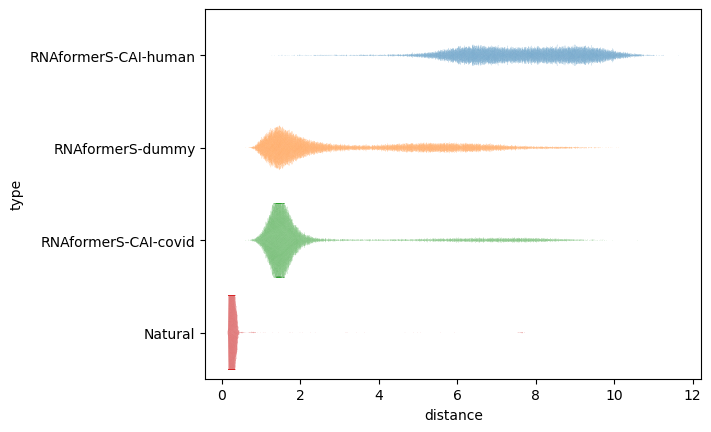

In [23]:
difs_human_df = pd.DataFrame(difs_human, columns=["distance"])
difs_human_df["type"] = "RNAformerS-CAI-human"

difs_df = pd.DataFrame(difs, columns=["distance"])
difs_df["type"] = "RNAformerS-dummy"

difs_covid_df = pd.DataFrame(difs_covid, columns=["distance"])
difs_covid_df["type"] = "RNAformerS-CAI-covid"

difs_natural_df = pd.DataFrame(difs_natural, columns=["distance"])
difs_natural_df["type"] = "Natural"

all_difs_df = pd.concat([difs_human_df, difs_df, difs_covid_df, difs_natural_df])
sns.swarmplot(data=all_difs_df, x="distance", y="type", size=0.2)

In [ ]:
difs = []
for cai in de_novo_cai_human_CAIs:
    difs.append(genetic_distance(cai, np.array(list(human_CAI.values()))))
    
# Calculate mean distance and std
mean_dif = np.mean(difs)
dif_std = np.std(difs)
print(mean_dif)
print(dif_std)
# Plot the distribution

difs_human_df = pd.DataFrame(difs_human, columns=["distance"])
difs_human_df["type"] = "RNAformerS-CAI-human"

difs_df = pd.DataFrame(difs, columns=["distance"])
difs_df["type"] = "RNAformerS-dummy"

difs_covid_df = pd.DataFrame(difs_covid, columns=["distance"])
difs_covid_df["type"] = "RNAformerS-CAI-covid"

sns.swarmplot(difs, size=2.5)

In [4]:
# human_proteome = SeqIO.parse(gzip.open(human_proteome_path, "rt"), "fasta")
# human_valid_proteome = []
# for seq_record in tqdm(human_proteome):
#     if is_gene_valid(seq_record.seq):
#         human_valid_proteome.append(seq_record)
#         # cai.cai_for_gene(str(seq_record.seq))

# human_CAI = CodonAdaptationIndex(human_valid_proteome)

# de_novo_cai_human_seqs_file = SeqIO.parse(de_novo_human_path, "fasta")
# de_novo_cai_human_CAIs = []
# for seq_record in tqdm(de_novo_cai_human_seqs_file):
#     if is_gene_valid(seq_record.seq):
#         de_novo_cai_human_CAIs.append(list(CodonAdaptationIndex([seq_record.seq]).values()))

# de_novo_cai_covid_seqs_file = SeqIO.parse(de_novo_covid_path, "fasta")
# de_novo_cai_covid_CAIs = []
# for seq_record in tqdm(de_novo_cai_covid_seqs_file):
#     if is_gene_valid(seq_record.seq):
#         de_novo_cai_covid_CAIs.append(list(CodonAdaptationIndex([seq_record.seq]).values()))
# de_novo_CAI = np.mean(de_novo_CAIs, axis=0)
# de_novo_CAI_std = np.std(de_novo_CAIs, axis=0)
# print(de_novo_CAI)
# print(de_novo_CAI_std)

def genetic_distance(cai_1, cai_2):
    return abs(cai_1 - cai_2).sum() / 2

# Calculate the distance between the de novo CAIs and the template CAI
difs_human = []
for cai in de_novo_cai_human_CAIs:
    difs_human.append(genetic_distance(np.array(cai), np.array(list(human_CAI.values()))))

mean_dif = np.mean(difs_human)
dif_std = np.std(difs_human)
print(mean_dif)
print(dif_std)

difs_covid = []
for cai in de_novo_cai_covid_CAIs:
    difs_covid.append(genetic_distance(np.array(cai), np.array(list(human_CAI.values()))))
    
# Calculate mean distance and std
mean_dif = np.mean(difs_covid)
dif_std = np.std(difs_covid)
print(mean_dif)
print(dif_std)

9.48598551104908
0.6396856648137854
11.501713259998958
0.6493846239823768


Text(0.5, 1.0, 'Swarmplot of distance to human CAI')

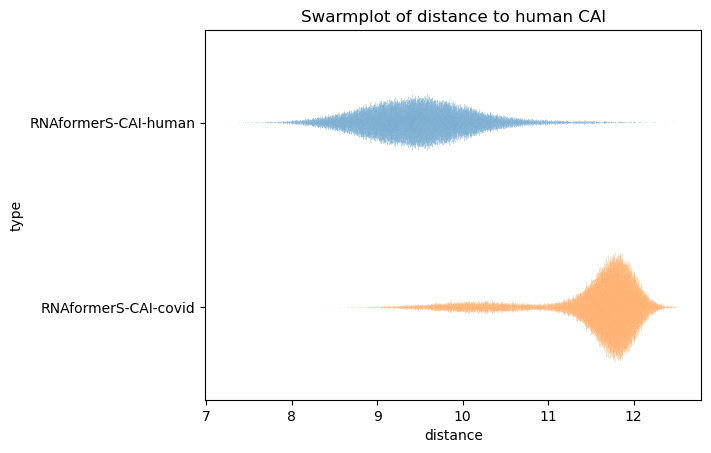

: 

In [20]:
difs_human_df = pd.DataFrame(difs_human, columns=["distance"])
difs_human_df["type"] = "RNAformerS-CAI-human"

# difs_df = pd.DataFrame(difs, columns=["distance"])
# difs_df["type"] = "RNAformerS-dummy"

difs_covid_df = pd.DataFrame(difs_covid, columns=["distance"])
difs_covid_df["type"] = "RNAformerS-CAI-covid"

# difs_natural_df = pd.DataFrame(difs_natural, columns=["distance"])
# difs_natural_df["type"] = "Natural"

all_difs_df = pd.concat([difs_human_df, difs_covid_df])
ax = sns.swarmplot(data=all_difs_df, x="distance", y="type", size=0.3)
plt.title("Swarmplot of distance to human CAI")